Exercise work consists of three parts. After each part, take the mini-exam available in Moodle. The questions concern the exercise so read the instructions carefully and make sure you remember to cover all given tasks. <br>
After the deadline of each mini-exam, example results will be published. This helps you to move to the next part. However, take into account that the deadlines are thus strict, no extensions will be granted! <br>
Two exam points can be acquired from each mini-exam. All three parts of the exercise are compulsory. Completed exercise work from previous years does not apply for this course.

**Deadlines for the mini-exams:**
- Part 1: Fri 9.2.2024 at 23:59
- Part 2: Fri 23.2024 at 23:59
- Part 3: Fri 8.3.2024 at 23:59

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives at maximum 6 points, i.e. the total score is 36 points.

# Part 1

# Part 2

Import all the packages needed for this notebook in one cell (add the ones you apply):

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Data exploration

Import the training data set prepared in the previous part of the exercise.

In [2]:
df = pd.read_parquet('rice_feature_data.parquet')#('../training_data/rice_feature_data.parquet')
df.head()

,mean_y,var_y,skew_y,kurt_y,mean_cr,var_cr,skew_cr,kurt_cr,mean_cb,var_cb,...,major_axis_length,minor_axis_length,area,perimeter,equivalent_diameter,compactness,shape_factor1,shape_factor2,class,class_int
0,218.428418,196.293361,-0.338596,-0.505395,127.369024,0.233115,0.546452,-1.691494,130.737778,1.854876,...,138.040466,71.104782,7582.0,365.705624,98.253256,0.711771,0.018206,0.009378,Arb,0
1,206.205057,84.868804,1.129581,2.096088,127.158176,0.133157,1.873486,1.509951,130.177003,0.690154,...,122.329712,58.245274,5551.5,314.977702,84.073714,0.687271,0.022035,0.010492,Arb,0
2,215.034536,366.365052,0.051898,-0.814170,128.246066,0.185518,1.179121,-0.609674,129.843894,0.976466,...,142.999100,66.076553,7342.0,369.563490,96.685701,0.676128,0.019477,0.009000,Arb,0
3,203.853259,214.463028,-0.487579,-0.702229,127.098179,0.088540,2.700806,5.294351,130.860517,1.253308,...,143.131638,68.949730,7735.5,369.605119,99.242856,0.693368,0.018503,0.008913,Arb,0
4,226.097925,248.915262,-0.806989,0.882970,128.265342,0.194935,1.062969,-0.870097,129.452778,1.924834,...,145.575623,63.361469,7050.5,369.605119,94.746902,0.650843,0.020648,0.008987,Arb,0


Standardize the data using Z-score.

In [3]:
#Excluding non-numeric values from the dataframe
numeric_df = df.drop(columns=['class', 'class_int'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
df_scaled = pd.DataFrame(scaled_data, columns=numeric_df.columns)
#Adding again the non-numeric data and class categories to the dataframe.
for column in ['class', 'class_int']:
    df_scaled[column] = df[column]
display(df_scaled.head())

,mean_y,var_y,skew_y,kurt_y,mean_cr,var_cr,skew_cr,kurt_cr,mean_cb,var_cb,...,major_axis_length,minor_axis_length,area,perimeter,equivalent_diameter,compactness,shape_factor1,shape_factor2,class,class_int
0,-0.189539,0.663085,-0.484918,-0.723800,0.426438,-0.480562,-0.227938,-0.180458,-0.507211,-0.571090,...,-0.665352,0.321248,-0.182390,-0.448377,-0.113360,0.654257,-0.547228,0.461517,Arb,0
1,-1.171772,-0.667290,1.650517,0.118346,0.346582,-0.569038,0.025026,-0.162598,-0.619518,-0.718146,...,-1.082999,-0.450514,-0.861651,-1.162162,-0.928327,0.447067,0.092735,1.046683,Arb,0
2,-0.462261,2.693689,0.083048,-0.823756,0.758610,-0.522692,-0.107336,-0.174423,-0.686230,-0.681997,...,-0.533534,0.019479,-0.262677,-0.394093,-0.203455,0.352831,-0.334884,0.262749,Arb,0
3,-1.360755,0.880026,-0.701611,-0.787518,0.323858,-0.608530,0.182732,-0.141487,-0.482629,-0.647043,...,-0.530010,0.191913,-0.131040,-0.393507,-0.056483,0.498622,-0.497611,0.217360,Arb,0
4,0.426760,1.291375,-1.166186,-0.274361,0.765911,-0.514356,-0.129477,-0.175875,-0.764559,-0.562258,...,-0.465041,-0.143466,-0.360192,-0.393507,-0.314887,0.139003,-0.139223,0.255920,Arb,0


### Histograms

Plot a histogram for each Z-scored feature. Plot all rice species in the same figure and use different color for each.

df_scaledWhich features may have some discriminative power over rice species according to the histograms?

In [4]:
rice_species_count = df_scaled['class'].value_counts()
print(rice_species_count)
total_rice_species_count = df_scaled['class'].count()
print(total_rice_species_count)


class
Arb    100
Bas    100
Ips    100
Jas    100
Kar    100
Name: count, dtype: int64
500


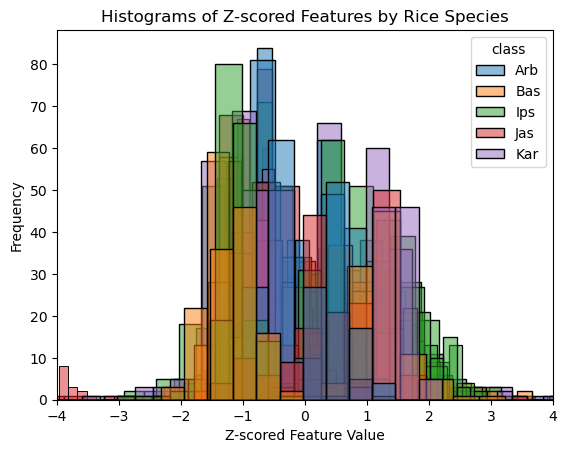

In [5]:
plt.xlim(-4, 4)
for column in numeric_df.columns:
    sns.histplot(data=df_scaled, x=column, hue='class')
plt.title('Histograms of Z-scored Features by Rice Species')
plt.xlabel('Z-scored Feature Value')
plt.ylabel('Frequency')
plt.show()

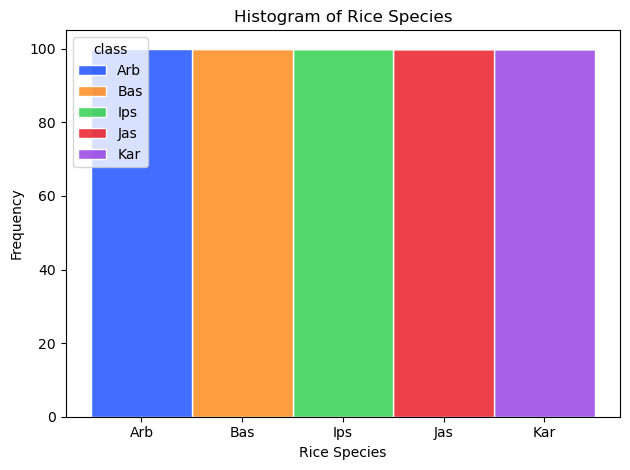

In [6]:
sns.histplot(data=df_scaled, x='class', hue='class', multiple='stack', palette='bright', edgecolor='white')
plt.title('Histogram of Rice Species')
plt.xlabel('Rice Species')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Pairplot

Plot pairplots, each Z-scored feature against each Z-scored feature. Are there any correlating features according to the pairplot?

In [ ]:
sns.pairplot(df_scaled)
plt.suptitle('Pairplot of Z-scored Features', y=1.02)
plt.show()

### PCA

Fit PCA using two principal components (remember to use Z-scored feature values). <br>
Plot the PCA figure with two components, and color the data points according to their species. <br>
Show the legend and label the axes.
Save the figure as a png-file.

Can you see any clusters in the PCA figure? Does this figure give you any clues, how well you will be able to classify the rice species? Explain.

How many PCA components are needed to cover 97% of the variance?

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled.drop(columns=['class', 'class_int']))
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, df_scaled['class']], axis=1)
print(final_df.head())

In [ ]:
import matplotlib.pyplot as plt
for rice_species in df_scaled['class'].unique():
    x = final_df.loc[final_df['class'] == rice_species, 'PC1']
    y = final_df.loc[final_df['class'] == rice_species, 'PC2']
    plt.scatter(x, y, label=rice_species)
plt.legend(title='Rice Species')
plt.title('PCA Plot with Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pca_plot.png')
plt.show()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components_97 = np.argmax(cumulative_variance_ratio >= 0.97) + 1
print("Number of components needed to cover 97% of the variance:", n_components_97)

## Model selection

Select the best model for each classifier. Use 5-fold repeated cross validation with 3 repetitions (*RepeatedKFold* from sklearn). Use the following hyperparameters:

- Random Forest
    - n_estimators from 100 to 300 with 50 steps
    - max_features = ['sqrt', 'log2', None]
    - whether to use bootstrap or not 

- Support Vector Machine
    - gamma = ['scale', 'auto']
    - C = [0.1, 1, 10, 100]
    - kernel = ['linear', 'rbf', 'poly']
    
- MLP:
    - use one hidden layer
    - number of neurons in the hidden layer from 15 to 40 in 5 neuron steps
    - activation function: hyperbolic tanh function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.3
    - strength of the L2 regularization term: alpha = [0.01, 0.1, 1]

For each classifier:
- Report the selected combination of hyperparameters <br>
- Report the accuracy value for each hyperparameter combination <br>

For Random Forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? <br>
Ponder the model selection process. Which things should be considered? How could you improve the model selection process?

Which model seems to benefit the most of the hyperparameter tuning (with these parameter combinations)?

#Random Forest

In [ ]:
X = final_df[['PC1', 'PC2']]
y = df['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]}
rf_classifier = RandomForestClassifier()
rkf = RepeatedKFold(n_splits=5, n_repeats=3)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=rkf, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Mean cross-validated score for Random Forest:", grid_search_rf.best_score_)

#Support Vector Machine SVM

In [ ]:
param_grid_svc = {
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']}
svc_classifier = SVC()
rkf = RepeatedKFold(n_splits=5, n_repeats=3)
grid_search_svc = GridSearchCV(estimator=svc_classifier, param_grid=param_grid_svc, cv=rkf, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)
best_svc_model = grid_search_svc.best_estimator_
print("Best hyperparameters for Support Vector Machine:", grid_search_svc.best_params_)
print("Mean cross-validated score for Support Vector Machine:", grid_search_svc.best_score_)

#MLP

In [ ]:
param_grid_mlp = {'hidden_layer_sizes': [(neurons,) for neurons in range(15, 41, 5)],
    'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'validation_fraction': [0.1, 0.3], 'alpha': [0.01, 0.1, 1]}
mlp_classifier = MLPClassifier()#(max_iter=500)
rkf = RepeatedKFold(n_splits=5, n_repeats=3)
grid_search_mlp = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid_mlp, cv=rkf, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
best_mlp_model = grid_search_mlp.best_estimator_
print("Best hyperparameters for MLP:", grid_search_mlp.best_params_)
print("Mean cross-validated score for MLP:", grid_search_mlp.best_score_)
results = pd.DataFrame(grid_search_mlp.cv_results_)
relevant_columns = ['param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_validation_fraction', 'param_alpha', 'mean_test_score']
results = results[relevant_columns]
results_sorted = results.sort_values(by='mean_test_score', ascending=False)
print("All results sorted by mean_test_score:")
display(results_sorted)